In [1]:
import pandas as pd
import pylab as pl

pl.style.use('bmh')
pd.options.mode.chained_assignment = None

T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\airbnb_paris.csv')
T.head()

Id   Id_Hote   Nom_Hote      Quartier   Latitude  Longitude  \
0  2788664   9024891      Jules  Ménilmontant  48.847907   2.401483   
1  2912397   7734570    Olivier  Ménilmontant  48.861348   2.401395   
2   830606   4350788  Catherine  Ménilmontant  48.862760   2.406240   
3  4434726   9846692      Julie  Ménilmontant  48.855482   2.403873   
4  6981068  12417393   Philippe  Ménilmontant  48.864844   2.401419   

              Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  Disponibilite  
0  Entire_home/apt    55          3   2015-02-11           0.29            332  
1  Entire_home/apt    49          4   2015-08-22           3.36            171  
2  Entire_home/apt    50          2   2015-08-23           1.41            101  
3  Entire_home/apt    57          2   2015-07-07           1.88            349  
4  Entire_home/apt    45         14          NaN            NaN            365

In [2]:
T['Duree']=12*T['Min_nuits']*T['Avis_par_mois']
T.head()

Id   Id_Hote   Nom_Hote      Quartier   Latitude  Longitude  \
0  2788664   9024891      Jules  Ménilmontant  48.847907   2.401483   
1  2912397   7734570    Olivier  Ménilmontant  48.861348   2.401395   
2   830606   4350788  Catherine  Ménilmontant  48.862760   2.406240   
3  4434726   9846692      Julie  Ménilmontant  48.855482   2.403873   
4  6981068  12417393   Philippe  Ménilmontant  48.864844   2.401419   

              Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  \
0  Entire_home/apt    55          3   2015-02-11           0.29   
1  Entire_home/apt    49          4   2015-08-22           3.36   
2  Entire_home/apt    50          2   2015-08-23           1.41   
3  Entire_home/apt    57          2   2015-07-07           1.88   
4  Entire_home/apt    45         14          NaN            NaN   

   Disponibilite   Duree  
0            332   10.44  
1            171  161.28  
2            101   33.84  
3            349   45.12  
4            365     NaN

In [3]:
T['Benefice']=T['Duree']*T['Prix']
T.head()

Id   Id_Hote   Nom_Hote      Quartier   Latitude  Longitude  \
0  2788664   9024891      Jules  Ménilmontant  48.847907   2.401483   
1  2912397   7734570    Olivier  Ménilmontant  48.861348   2.401395   
2   830606   4350788  Catherine  Ménilmontant  48.862760   2.406240   
3  4434726   9846692      Julie  Ménilmontant  48.855482   2.403873   
4  6981068  12417393   Philippe  Ménilmontant  48.864844   2.401419   

              Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  \
0  Entire_home/apt    55          3   2015-02-11           0.29   
1  Entire_home/apt    49          4   2015-08-22           3.36   
2  Entire_home/apt    50          2   2015-08-23           1.41   
3  Entire_home/apt    57          2   2015-07-07           1.88   
4  Entire_home/apt    45         14          NaN            NaN   

   Disponibilite   Duree  Benefice  
0            332   10.44    574.20  
1            171  161.28   7902.72  
2            101   33.84   1692.00  
3            349   45.12   2571.84  
4            365     NaN       NaN

In [4]:
T.describe()

Id       Id_Hote      Latitude     Longitude          Prix  \
count  3.542800e+04  3.542800e+04  35428.000000  35428.000000  35428.000000   
mean   4.267450e+06  1.454641e+07     48.863487      2.342267    100.979028   
std    2.388210e+06  1.177517e+07      0.018743      0.034037     86.214473   
min    2.525000e+03  2.626000e+03     48.813911      2.222420     13.000000   
25%    2.081686e+06  4.517288e+06     48.849359      2.320642     59.000000   
50%    4.481972e+06  1.091783e+07     48.864521      2.345484     80.000000   
75%    6.388248e+06  2.317752e+07     48.879339      2.365812    115.000000   
max    8.192227e+06  4.321032e+07     48.901866      2.475516   3301.000000   

          Min_nuits  Avis_par_mois  Disponibilite         Duree      Benefice  
count  35428.000000   25213.000000   35428.000000  25213.000000  2.521300e+04  
mean       2.917128       1.441293     226.758411     43.123887  4.279138e+03  
std        5.531840       1.338834     128.656189    132.325564  1.402960e+04  
min        1.000000       0.020000       0.000000      0.240000  1.080000e+01  
25%        1.000000       0.490000      93.000000     12.000000  9.110400e+02  
50%        2.000000       1.000000     274.000000     27.360000  2.241000e+03  
75%        3.000000       2.000000     338.000000     55.200000  4.968000e+03  
max      365.000000      13.000000     365.000000  16545.600000  1.654560e+06

# Benefits minimum

In [5]:

P=T.query('0< Duree <=Disponibilite')

In [6]:
P['Benefice'].describe()

count     21839.000000
mean       3740.167154
std        5104.631389
min          10.800000
25%         842.400000
50%        2065.800000
75%        4621.320000
max      184017.600000
Name: Benefice, dtype: float64

# Benefits average by district

In [7]:
D=P.groupby('Quartier')[['Quartier','Benefice']].mean(numeric_only=True)
D

Benefice
Quartier                        
Batignolles-Monceau  3035.002885
Bourse               5172.277187
Buttes-Chaumont      1845.423135
Buttes-Montmartre    2741.074808
Entrepôt             3406.593408
Gobelins             2485.679467
Hôtel-de-Ville       6757.360049
Louvre               6506.480787
Luxembourg           6390.998735
Ménilmontant         1729.580000
Observatoire         2374.844648
Opéra                3687.985792
Palais-Bourbon       5811.217849
Panthéon             4407.582793
Passy                3923.231738
Popincourt           3271.628844
Reuilly              2562.454804
Temple               5869.789857
Vaugirard            3140.575208
Élysée               5290.877739

In [8]:
import geopandas as gp

J=gp.read_file(r'C:\Users\julia\Documents\python36\datasource\data\paris.geojson')
J.head()

perimetre  surf_km2        quartier  ar  \
0   8282.011886  3.665442      Popincourt  11   
1  13678.798315  8.494994       Vaugirard  15   
2  11546.546526  7.149311        Gobelins  13   
3   4519.263648  1.170883          Temple   3   
4   8099.424883  4.090057  Palais-Bourbon   7   

                                            geometry  
0  POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...  
1  POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...  
2  POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...  
3  POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...  
4  POLYGON ((2.32090 48.86306, 2.32094 48.86305, ...

# Choropleth

In [9]:
import plotly.express as px

fig1 = px.choropleth(
    data_frame = D.reset_index(),
    locations = 'Quartier',
    geojson = J,
    featureidkey = 'properties.quartier',
    color = 'Benefice',
    color_continuous_scale = [(0, 'rgb(250, 250, 250)'),
                             (0.25, 'rgb(200, 200, 200)'),
                             (0.5, 'rgb(150, 150, 150)'),
                             (0.75, 'rgb(100, 100, 100)'),
                             (1, 'rgb(50, 50, 50)')]
)

fig1.update_layout(
    coloraxis = {'colorbar' : {'len' : 0.7,
                               'x':0.95,
                               'y':0.6,
                               'title' : '<b> Benefice moyen par logement</b>',
                              }
                },
    
title ={'text' : "Airbnb à Paris",
       'font' : {'family' : 'comic sans MS',
                'color' : 'black'},
       'y' : 0.9,
       'x' : 0.1},
    showlegend = True,
)

fig1.update_geos(
    fitbounds = 'locations', visible = False,
    projection = {'type' : 'transverse mercator'})


fig1.show()

# Heatmap 

In [12]:
fig2=px.density_mapbox(
    data_frame = P,
    lat = 'Latitude', lon = 'Longitude',
    radius=4,
    color_continuous_scale=[(0,'black'),
                            (0.5, 'red'),
                            (1,'black')],
    opacity=0.5,
    hover_name='Quartier'
)

fig2.update_layout(
    mapbox={'style':"open-street-map",
            'center':{'lat':T['Latitude'].mean(),
                      'lon':T['Longitude'].mean()},
           'zoom':11.4
           },
    coloraxis_showscale = False
)
fig2.show()

In [14]:
N=P['Quartier'].value_counts()
N

Buttes-Montmartre      2396
Popincourt             1696
Vaugirard              1565
Batignolles-Monceau    1442
Entrepôt               1426
Passy                  1191
Buttes-Chaumont        1091
Panthéon               1067
Ménilmontant           1038
Opéra                   991
Observatoire            981
Luxembourg              917
Temple                  911
Reuilly                 843
Bourse                  839
Hôtel-de-Ville          818
Palais-Bourbon          753
Élysée                  690
Gobelins                676
Louvre                  508
Name: Quartier, dtype: int64

# Hotel

In [17]:
H = pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\hotels_paris.csv')
H.head()

nom_commercial  ar quartier  etoiles  nb_chambres        lat  \
0    HÔTEL LOUVRE MONTANA   1   Louvre        4           25  48.864480   
1  HÔTEL LOUVRE RICHELIEU   1   Louvre        3           13  48.866477   
2       RELAIS DES HALLES   1   Louvre        3           19  48.863213   
3   HÔTEL OPÉRA MAINTENON   1   Louvre        2           19  48.866795   
4              HÔTEL SNOB   1   Louvre        4           24  48.862409   

       long  
0  2.331768  
1  2.337195  
2  2.348910  
3  2.335859  
4  2.349543

In [19]:
E=pd.crosstab(H['quartier'],H['etoiles'])
E

etoiles              1   2   3   4   5
quartier                              
Batignolles-Monceau  4  13  57  29   1
Bourse               1   3  17  16   1
Buttes-Chaumont      0  10  10   2   0
Buttes-Montmartre    2  13  20  12   0
Entrepôt             5  28  49  15   1
Gobelins             0  10  22   7   0
Hôtel-de-Ville       1   4  18   6   1
Louvre               0   6  21  25  14
Luxembourg           1   9  37  38   6
Ménilmontant         0   5  11   0   0
Observatoire         5  18  47  14   0
Opéra                2  21  88  43   7
Palais-Bourbon       0   4  28  20   4
Panthéon             1  14  35  20   0
Passy                0   4  28  25   8
Popincourt           1  17  34   8   1
Reuilly              1  16  34  10   0
Temple               0   3  10   8   1
Vaugirard            2  17  56  19   0
Élysée               1   6  37  56  32

C:\Users\julia\AppData\Local\Temp\ipykernel_17676\3455890428.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



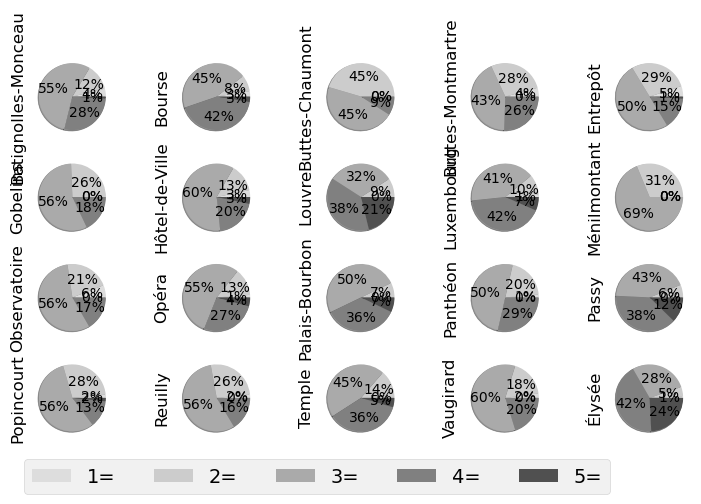

In [21]:
fig3,ax=pl.subplots(figsize=(9,5))
E.T.plot.pie(ax=ax,legend=None,
            layout=(4,5), subplots=True,
            labeldistance=None,
            autopct=lambda x:str(round(x))+'%',
            shadow=True,
            colors=['#DDD','#CCC','#AAA',
                   '#808080', '#505050'],
            labels=range(1,6)
            )
fig3.legend(
    bbox_to_anchor=(0.8, 0.09),
    ncol =6,
    fontsize=14,
    labels=[str(k)+'=' for k in range(1,6)])

In [22]:
C=H.groupby('quartier').sum()['nb_chambres']
C

quartier
Batignolles-Monceau    7035
Bourse                 1703
Buttes-Chaumont        2279
Buttes-Montmartre      2839
Entrepôt               4851
Gobelins               2020
Hôtel-de-Ville          817
Louvre                 3841
Luxembourg             3362
Ménilmontant            758
Observatoire           6182
Opéra                  7751
Palais-Bourbon         1961
Panthéon               2637
Passy                  2816
Popincourt             2901
Reuilly                4113
Temple                  801
Vaugirard              6218
Élysée                 8239
Name: nb_chambres, dtype: int64

In [23]:
R=(N/C).round(1)
R

Batignolles-Monceau    0.2
Bourse                 0.5
Buttes-Chaumont        0.5
Buttes-Montmartre      0.8
Entrepôt               0.3
Gobelins               0.3
Hôtel-de-Ville         1.0
Louvre                 0.1
Luxembourg             0.3
Ménilmontant           1.4
Observatoire           0.2
Opéra                  0.1
Palais-Bourbon         0.4
Panthéon               0.4
Passy                  0.4
Popincourt             0.6
Reuilly                0.2
Temple                 1.1
Vaugirard              0.3
Élysée                 0.1
dtype: float64

In [25]:
for k in J.index:
    nom=J.loc[k,'quartier']
    J.loc[k,'ratio']=R[nom]
J.head()

perimetre  surf_km2        quartier  ar  \
0   8282.011886  3.665442      Popincourt  11   
1  13678.798315  8.494994       Vaugirard  15   
2  11546.546526  7.149311        Gobelins  13   
3   4519.263648  1.170883          Temple   3   
4   8099.424883  4.090057  Palais-Bourbon   7   

                                            geometry  ratio  
0  POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...    0.6  
1  POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...    0.3  
2  POLYGON ((2.37491 48.83801, 2.37698 48.83610, ...    0.3  
3  POLYGON ((2.36383 48.86750, 2.36389 48.86747, ...    1.1  
4  POLYGON ((2.32090 48.86306, 2.32094 48.86305, ...    0.4

# Benefits

In [26]:
P['Id_Hote'].value_counts()

2288803     67
3943828     44
3971743     43
11593703    31
2667370     29
            ..
19925520     1
4443485      1
4103508      1
32960305     1
2157959      1
Name: Id_Hote, Length: 18818, dtype: int64

In [29]:
M=P.query('Id_Hote==2288803')
M.head()

Id  Id_Hote Nom_Hote Quartier   Latitude  Longitude  \
131   5199936  2288803   Fabien    Passy  48.867961   2.283107   
1306  5612738  2288803      NaN   Louvre  48.865914   2.330231   
1412  5476593  2288803   Fabien   Élysée  48.879446   2.315569   
1432  5198083  2288803      NaN   Temple  48.864698   2.356757   
1449  5190895  2288803   Fabien   Temple  48.863457   2.351401   

                 Type  Prix  Min_nuits Dernier_avis  Avis_par_mois  \
131   Entire_home/apt   578          5   2015-04-12           0.38   
1306  Entire_home/apt   239          5   2015-06-25           0.42   
1412  Entire_home/apt   213          5   2015-06-24           0.42   
1432  Entire_home/apt   154          5   2015-06-29           0.45   
1449  Entire_home/apt   193          5   2015-07-13           0.64   

      Disponibilite  Duree  Benefice  
131             310   22.8   13178.4  
1306            277   25.2    6022.8  
1412            263   25.2    5367.6  
1432            313   27.0    4158.0  
1449            319   38.4    7411.2

In [30]:
M['Benefice'].describe()

count       67.000000
mean      8956.350448
std       6808.270617
min       1476.000000
25%       3926.100000
50%       6501.600000
75%      11721.000000
max      30597.600000
Name: Benefice, dtype: float64

In [33]:
P['Id_Hote'].value_counts().value_counts().sort_index()

1     17453
2       988
3       169
4        69
5        28
6        12
7        21
8         6
9        12
10        3
11        5
12        4
13        5
14        7
15        4
16        3
17        2
18        8
19        1
20        2
21        4
22        1
24        3
25        1
26        1
28        1
29        1
31        1
43        1
44        1
67        1
Name: Id_Hote, dtype: int64